In [266]:
!pip install geopandas
import geopandas as gpd
import pandas as pd 
import numpy as np
import os
import re
!pip install Levenshtein
import Levenshtein
!pip install fuzzywuzzy
import fuzzywuzzy
from datetime import datetime
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [267]:
os.listdir()

['.ipynb_checkpoints',
 'Admin2.shp',
 'Admin2.shx',
 'ameo_data_description.docx',
 'data.xlsx - Sheet1.csv',
 'EDA Project - AMCAT Data Analysis.docx',
 'india-osm.geojson',
 'Innomatics_Project_Report_Template with EDA_Project_Student_Template (1).pptx',
 'Untitled.ipynb',
 '~$Innomatics_Project_Report_Template with EDA_Project_Student_Template (1).pptx']

In [268]:
df = pd.read_csv('data.xlsx - Sheet1.csv')

In [269]:
#droping the forst column
print(df['Unnamed: 0'].unique())
df.drop('Unnamed: 0',axis =1,inplace = True)

['train']


In [270]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [271]:
df.shape

(3998, 38)

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3998 non-null   int64  
 1   Salary                 3998 non-null   float64
 2   DOJ                    3998 non-null   object 
 3   DOL                    3998 non-null   object 
 4   Designation            3998 non-null   object 
 5   JobCity                3998 non-null   object 
 6   Gender                 3998 non-null   object 
 7   DOB                    3998 non-null   object 
 8   10percentage           3998 non-null   float64
 9   10board                3998 non-null   object 
 10  12graduation           3998 non-null   int64  
 11  12percentage           3998 non-null   float64
 12  12board                3998 non-null   object 
 13  CollegeID              3998 non-null   int64  
 14  CollegeTier            3998 non-null   int64  
 15  Degr

In [273]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [274]:
#Convert the date into right format
df.DOB = pd.to_datetime(df.DOB)
df.DOJ = pd.to_datetime(df.DOJ)

df.DOL = df.DOL.replace('present',pd.to_datetime(datetime.now()) , regex = False)
df.DOL = pd.to_datetime(df.DOL)

C:\Users\saile\AppData\Local\Temp\ipykernel_14112\3642826938.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.DOB = pd.to_datetime(df.DOB)
C:\Users\saile\AppData\Local\Temp\ipykernel_14112\3642826938.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.DOJ = pd.to_datetime(df.DOJ)


In [275]:
#droping the null rows
df.drop(df[df.GraduationYear == 0].index,inplace = True)
df.reset_index(drop=True,inplace = True)

In [276]:
df.isnull().sum()

ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
o

In [277]:
num_features = df.select_dtypes(include = ['number']).columns
cat_features = df.select_dtypes(include = ['object']).columns

In [278]:
cat_features

Index(['Designation', 'JobCity', 'Gender', '10board', '12board', 'Degree',
       'Specialization', 'CollegeState'],
      dtype='object')

In [279]:
choices_10board = ['west bengal board of secondary eucation','wbbse','uttrakhand board','uttranchal board','up board','uttar pradesh board','bihar examination board','andhra pradesh state board','bihar school examination board','board of school education harayana''board of secondary education orissa','board of secondary education rajasthan','board of secondary education, andhra pradesh','board secondary  education','bse,odisha', 'central board of secondary education','cbse','dav public school','gujarat board','himachal pradesh board','holy cross matriculation hr sec school','hbse','gyan bharati school','ghseb','education board of kerala','don bosco maatriculation school','delhi board','delhi public school','council for indian school certificate examination','cgbse','icse','icse board','j&k state board of school education','jharkhand academic council','jharkhand secondary board','jharkhand secondary education board','jseb','karnataka education board','karnataka secondary education','karnataka state board','kerala','kerala state board','ksbe','latur board','madhya pradesh board','maharashtra board','maharashtra state board','maharashtra state board of secondary and higher secondary education','maharashtra state board,pune','matriculation board','secondary school certificate','state board of secondary education,andhra pradesh','up baord','uttar pradesh board',]
from fuzzywuzzy import process
def spelling_correction(target= '', choices  = choices_10board,threshold = 65):
    match, score = process.extractOne(target, choices)
    if score >= threshold:
        return match
    else:
        return target

In [280]:
# Cleaning categorical values
# case,spaces, spelling correction, null values

for i in cat_features:
    df[str(i)] = df[str(i)].apply(lambda a : a.lower().strip())
    
df['10board'] = df['10board'].apply(spelling_correction)
df['10board'] = df['10board'].str.replace('0','others',regex = False)


In [281]:
len(num_features)

27

In [282]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,2012-06-01,2024-03-03 21:22:09.025398,senior quality engineer,bangalore,f,1990-02-19,84.3,board secondary education,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,2013-09-01,2024-03-03 21:22:09.025398,assistant manager,indore,m,1989-10-04,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,2014-06-01,2024-03-03 21:22:09.025398,systems engineer,chennai,f,1992-08-03,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,2011-07-01,2024-03-03 21:22:09.025398,senior software engineer,gurgaon,m,1989-12-05,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,2014-03-01,2015-03-01 00:00:00.000000,get,manesar,m,1991-02-27,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [283]:
num_features

Index(['ID', 'Salary', '10percentage', '12graduation', '12percentage',
       'CollegeID', 'CollegeTier', 'collegeGPA', 'CollegeCityID',
       'CollegeCityTier', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [284]:
cont_features = ['Salary', '10percentage', '12percentage','collegeGPA', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism']

# Exploratory Data Analysis 

## Univariate Analysis

In [285]:
#droping the features which are not needed for analysis 
num_features = ['Salary', '10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

In [286]:
df[num_features].agg(['min', 'max','skew','kurt' ,'mean', 'median'])

,Salary,10percentage,12percentage,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
min,3.500000e+04,43.000000,40.000000,6.450000,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
max,4.000000e+06,97.760000,98.700000,99.930000,875.000000,795.000000,900.000000,0.999910,840.000000,612.000000,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400
skew,6.450352e+00,-0.590737,-0.032115,-1.249347,0.192034,-0.216885,-0.019020,-1.921746,-0.778888,1.195591,1.529130,4.040383,5.059703,3.040765,10.314356,-0.526709,-1.204611,-0.523450,0.165550,-1.507948
kurt,8.090983e+01,-0.110244,-0.630459,10.232090,-0.252684,-0.223942,-0.101392,3.894145,-0.664330,-0.211318,0.691403,15.113365,24.870772,7.807094,109.012886,0.122820,3.389541,0.643402,-0.192222,5.792720
mean,3.076955e+05,77.922672,74.463680,71.486853,501.600701,501.560420,513.336502,0.510428,353.191394,95.352514,90.765324,22.868902,16.483112,31.859395,2.684764,-0.038124,0.146438,0.002838,-0.168984,-0.137834
median,3.000000e+05,79.140000,74.400000,71.720000,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300


In [287]:
#outliers removed for salary using Fencing for better analysis
df1 = df[df.Salary < 1750000]
df1.reset_index(drop=True,inplace = True)

C:\Users\saile\AppData\Local\Temp\ipykernel_14112\471278016.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

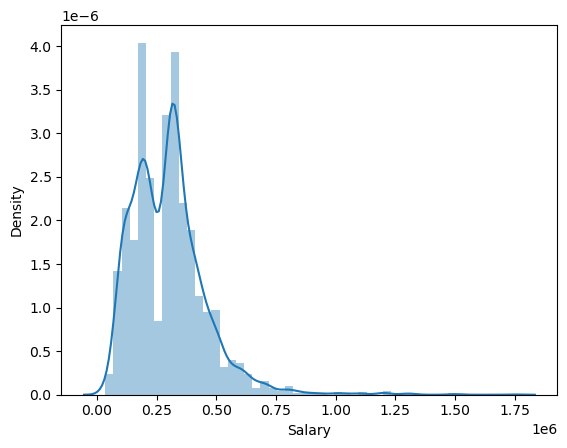

In [288]:
sns.distplot(df1['Salary'])

In [289]:
#droping a few cateforical columns due to high cardinality
cat_features = ['Gender','Degree','CollegeState']
df1 = df1.drop(['Designation', 'JobCity', '10board', '12board','Specialization'],axis = 1)

In [290]:
#removing the outliers with the help of cardinality
df2 = df1[df1.Degree != 'm.sc. (tech.)']

other_states = df1.CollegeState.value_counts()[df1.CollegeState.value_counts() < 10].index
df2.CollegeState = df2.CollegeState.replace(other_states,'others')

C:\Users\saile\AppData\Local\Temp\ipykernel_14112\2766984403.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.CollegeState = df2.CollegeState.replace(other_states,'others')


In [291]:
df2.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Gender', 'DOB', '10percentage',
       '12graduation', '12percentage', 'CollegeID', 'CollegeTier', 'Degree',
       'collegeGPA', 'CollegeCityID', 'CollegeCityTier', 'CollegeState',
       'GraduationYear', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [292]:
df2.reset_index(drop=True,inplace = True)

In [293]:
df2.drop(['ID','CollegeID','CollegeCityID'], axis = 1, inplace = True)

C:\Users\saile\AppData\Local\Temp\ipykernel_14112\3249979032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(['ID','CollegeID','CollegeCityID'], axis = 1, inplace = True)


In [294]:
#Feature Engineering 

In [295]:
#age 
df2['Age'] = df2.DOB.apply(lambda a : pd.to_datetime(datetime.now()).year - a.year)
df2.drop('DOB', axis =1,inplace = True)

C:\Users\saile\AppData\Local\Temp\ipykernel_14112\3527829853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Age'] = df2.DOB.apply(lambda a : pd.to_datetime(datetime.now()).year - a.year)
C:\Users\saile\AppData\Local\Temp\ipykernel_14112\3527829853.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop('DOB', axis =1,inplace = True)


In [296]:
df2.drop('Domain' , axis = 1, inplace = True)

C:\Users\saile\AppData\Local\Temp\ipykernel_14112\3990402361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop('Domain' , axis = 1, inplace = True)


<Axes: xlabel='English', ylabel='Density'>

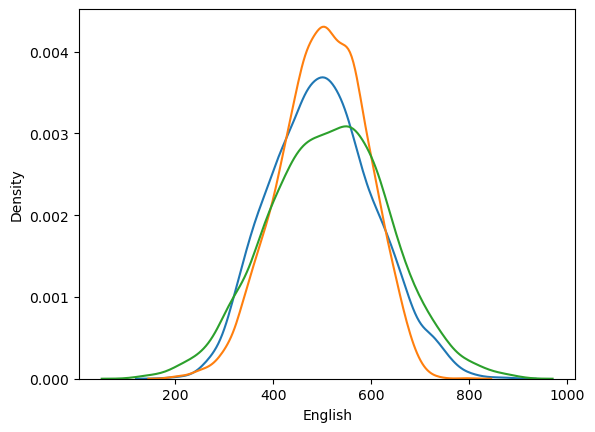

In [297]:
sns.kdeplot(df2['English'])
sns.kdeplot(df2['Logical'])
sns.kdeplot(df2['Quant'])

<Axes: xlabel='conscientiousness', ylabel='Density'>

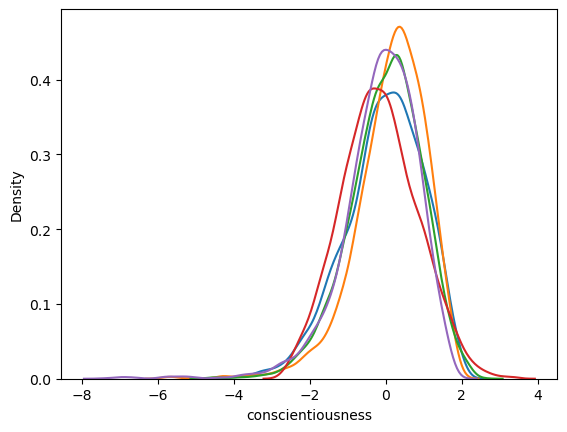

In [298]:
sns.kdeplot(df2['conscientiousness'])
sns.kdeplot(df2['agreeableness'])
sns.kdeplot(df2['extraversion'])
sns.kdeplot(df2['nueroticism'])
sns.kdeplot(df2['openess_to_experience'])

In [299]:
df2['Cognitive'] = (df2['English'] + df2['Logical'] + df2['Quant'] + df2['openess_to_experience']) / 4
df2.drop(['English','Logical' , 'Quant','openess_to_experience' ], axis = 1, inplace = True)

C:\Users\saile\AppData\Local\Temp\ipykernel_14112\3603257511.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Cognitive'] = (df2['English'] + df2['Logical'] + df2['Quant'] + df2['openess_to_experience']) / 4
C:\Users\saile\AppData\Local\Temp\ipykernel_14112\3603257511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(['English','Logical' , 'Quant','openess_to_experience' ], axis = 1, inplace = True)


In [300]:
df2['Personality'] = (df2['conscientiousness'] + df2['agreeableness'] + df2['extraversion'] + df2['nueroticism']) / 4
df2.drop(['conscientiousness','agreeableness' , 'extraversion' , 'nueroticism' ], axis = 1, inplace = True)

C:\Users\saile\AppData\Local\Temp\ipykernel_14112\684294667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Personality'] = (df2['conscientiousness'] + df2['agreeableness'] + df2['extraversion'] + df2['nueroticism']) / 4
C:\Users\saile\AppData\Local\Temp\ipykernel_14112\684294667.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(['conscientiousness','agreeableness' , 'extraversion' , 'nueroticism' ], axis = 1, inplace = True)


In [301]:
df2.columns

Index(['Salary', 'DOJ', 'DOL', 'Gender', '10percentage', '12graduation',
       '12percentage', 'CollegeTier', 'Degree', 'collegeGPA',
       'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'Age',
       'Cognitive', 'Personality'],
      dtype='object')

In [302]:
df2['Service'] = df2.DOL.apply(lambda a : a.year) - df2.DOJ.apply(lambda a : a.year)
df2.drop(['DOJ','DOL'], axis = 1, inplace = True)

C:\Users\saile\AppData\Local\Temp\ipykernel_14112\1616226712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Service'] = df2.DOL.apply(lambda a : a.year) - df2.DOJ.apply(lambda a : a.year)
C:\Users\saile\AppData\Local\Temp\ipykernel_14112\1616226712.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(['DOJ','DOL'], axis = 1, inplace = True)


In [303]:
df2 = df2[df2.Service < 30]

C:\Users\saile\AppData\Local\Temp\ipykernel_14112\4029869778.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

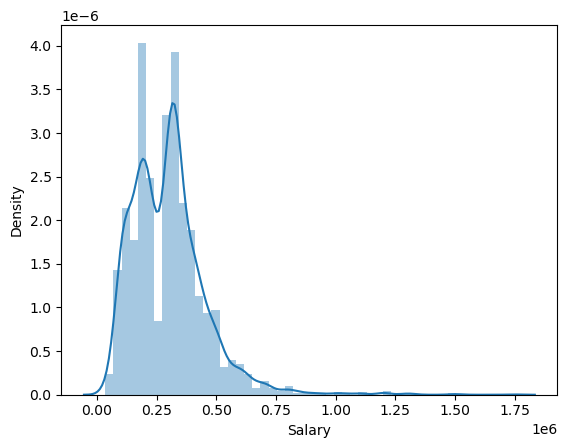

In [304]:
#Exploratory data analysis
#univariate analysis

sns.distplot(df2['Salary'])

<Axes: xlabel='12percentage', ylabel='Density'>

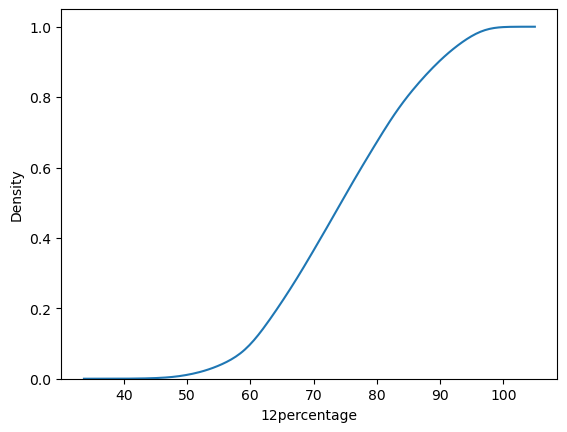

In [305]:
sns.kdeplot(df2['12percentage'], cumulative = True)

In [306]:
df2.columns

Index(['Salary', 'Gender', '10percentage', '12graduation', '12percentage',
       'CollegeTier', 'Degree', 'collegeGPA', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'Age', 'Cognitive',
       'Personality', 'Service'],
      dtype='object')

<Axes: xlabel='Salary', ylabel='Service'>

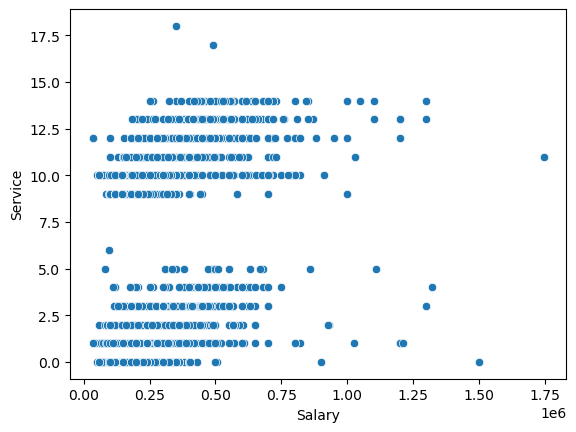

In [307]:
sns.scatterplot(x = df2['Salary'],y = df2['Service'])

In [308]:
cont_features = ['Salary','10percentage','12percentage','collegeGPA','ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg',]

<Axes: xlabel='Salary', ylabel='Age'>

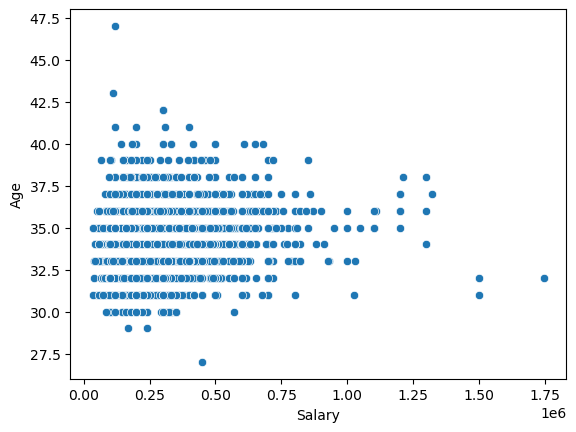

In [309]:
sns.scatterplot(x = df2['Salary'],y = df2['Age'])

In [310]:
df2[['Salary','Age']].corr()

,Salary,Age
Salary,1.000000,0.169123
Age,0.169123,1.000000


<Axes: xlabel='Salary', ylabel='Personality'>

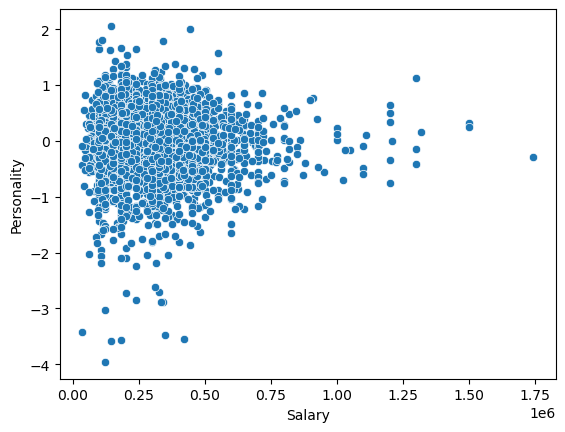

In [311]:
sns.scatterplot(x = df2['Salary'],y = df2['Personality'])

<Axes: xlabel='Salary', ylabel='Age'>

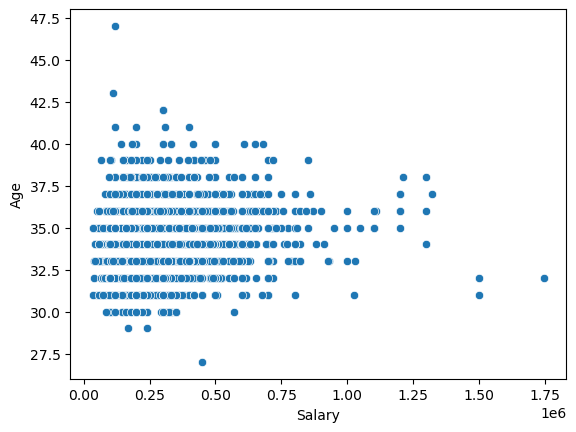

In [312]:
sns.scatterplot(x = df2['Salary'],y = df2['Age'])

In [313]:
df2[['Salary','Age']].corr()

,Salary,Age
Salary,1.000000,0.169123
Age,0.169123,1.000000


<Axes: xlabel='Salary', ylabel='12graduation'>

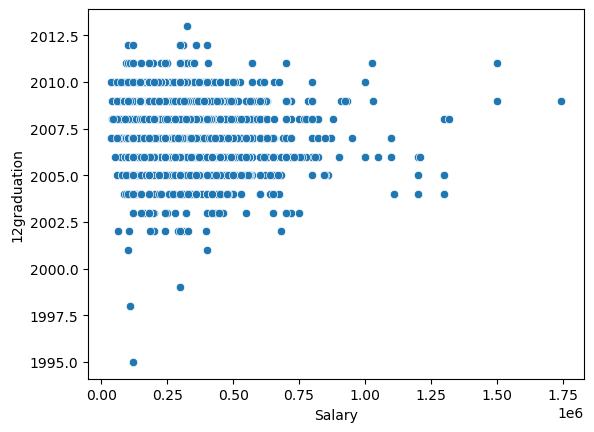

In [314]:
sns.scatterplot(x = df2['Salary'],y = df2['12graduation'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


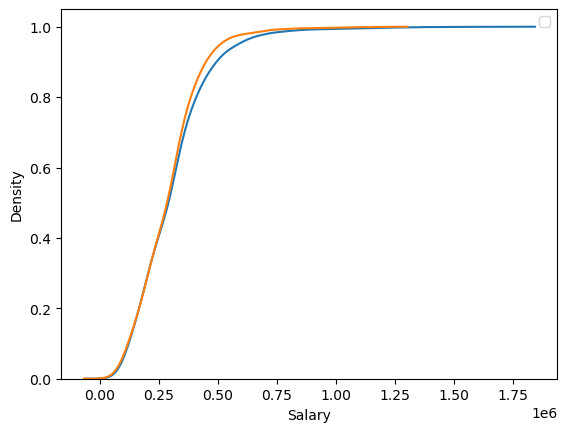

In [315]:
sns.kdeplot(df2[df2.Gender == 'm']['Salary'], cumulative = True)
sns.kdeplot(df2[df2.Gender == 'f']['Salary'], cumulative = True)
plt.xlabel = 'Male'
plt.legend()
plt.show()

<Axes: xlabel='CollegeTier', ylabel='Salary'>

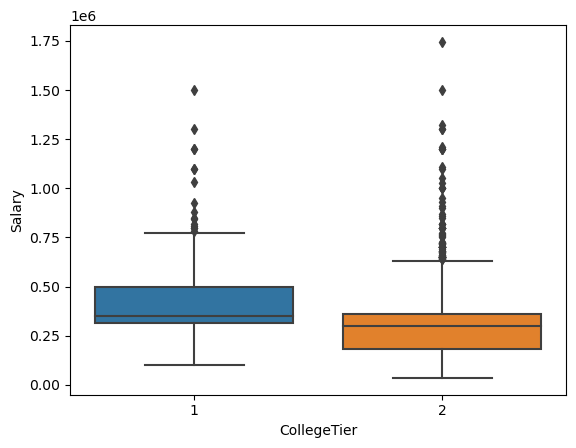

In [316]:
sns.boxplot(x = df2['CollegeTier'],y = df2['Salary'])

<Axes: xlabel='Salary', ylabel='Density'>

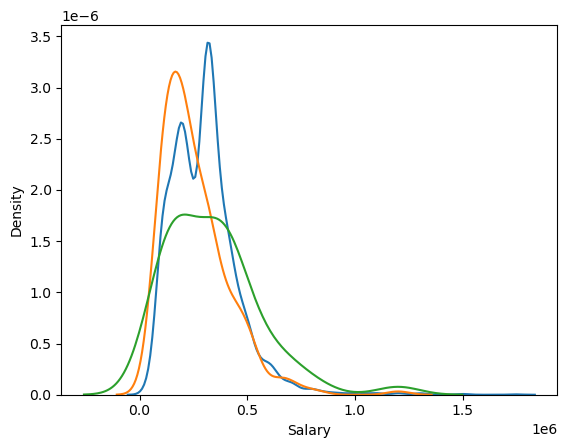

In [317]:
sns.kdeplot(df2[df2.Degree == 'b.tech/b.e.']['Salary'])
sns.kdeplot(df2[df2.Degree == 'mca']['Salary'])
sns.kdeplot(df2[df2.Degree == 'm.tech./m.e.']['Salary'])

In [318]:
df2.columns

Index(['Salary', 'Gender', '10percentage', '12graduation', '12percentage',
       'CollegeTier', 'Degree', 'collegeGPA', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'Age', 'Cognitive',
       'Personality', 'Service'],
      dtype='object')

In [319]:
df3 = pd.DataFrame({
    'State' : sorted(list(df2.CollegeState.unique())),
    'avg_s' :  [i[0] for i in np.array(df2.groupby(['CollegeState'])[['Salary']].median())]
})

In [320]:
df3.head

<bound method NDFrame.head of                State     avg_s
0     andhra pradesh  305000.0
1              bihar  185000.0
2       chhattisgarh  240000.0
3              delhi  330000.0
4            gujarat  205000.0
5            haryana  277500.0
6   himachal pradesh  307500.0
7          jharkhand  442500.0
8          karnataka  315000.0
9             kerala  320000.0
10    madhya pradesh  305000.0
11       maharashtra  300000.0
12            orissa  317500.0
13            others  350000.0
14            punjab  300000.0
15         rajasthan  277500.0
16        tamil nadu  240000.0
17         telangana  300000.0
18     uttar pradesh  260000.0
19       uttarakhand  290000.0
20       west bengal  300000.0>

In [321]:
df3.head()

,State,avg_s
0,andhra pradesh,305000.0
1,bihar,185000.0
2,chhattisgarh,240000.0
3,delhi,330000.0
4,gujarat,205000.0


In [322]:
states_names = [ 'Arunachal Pradesh', 'Assam','delhi', 'karnataka',
                'Manipur',  'Meghalaya', 'Mizoram', 'Nagaland', 'punjab',
                'rajasthan', 'Sikkim', 'Tripura', 'uttarakhand', 'telangana',
                'bihar', 'kerala','madhya pradesh',  'Ladakh', 'gujarat', 'Jammu & Kashmir',  'orissa',
                'Dadra and Nagar Haveli and Daman & Diu.', 'Lakshadweep','chhattisgarh', 'Puducherry','Goa', 'haryana',
                 'himachal pradesh', 'jharkhand','tamil nadu', 'uttar pradesh', 'west bengal', 'andhra pradesh',
                'Chandigarh', 'maharashtra', 'others']

In [323]:
india_states = gpd.read_file('Admin2.shx')

<Axes: >

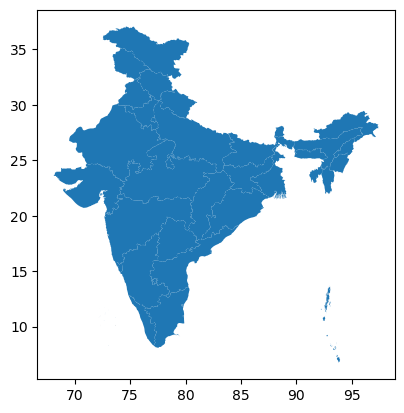

In [324]:
india_states.plot()

In [325]:
india_states['value'] = [i for i in range(36)]
india_states['State'] =states_names

In [326]:
df4 = pd.merge(india_states,df3 ,on = 'State', how = 'inner')

In [327]:
df4

,geometry,value,State,avg_s
0,"POLYGON ((76.77175 30.79498, 76.77231 30.79420...",2,delhi,330000.0
1,"POLYGON ((77.32647 18.45884, 77.32648 18.45803...",3,karnataka,315000.0
2,"POLYGON ((75.83873 32.51270, 75.84163 32.51123...",8,punjab,300000.0
3,"POLYGON ((73.97324 30.12272, 73.97508 30.12008...",9,rajasthan,277500.0
4,"POLYGON ((79.07185 31.45610, 79.07263 31.45519...",12,uttarakhand,290000.0
5,"POLYGON ((78.32306 19.91679, 78.32434 19.91674...",13,telangana,300000.0
6,"POLYGON ((84.10851 27.52135, 84.10899 27.52069...",14,bihar,185000.0
7,"POLYGON ((74.98962 12.79555, 74.99124 12.79561...",15,kerala,320000.0
8,"POLYGON ((78.35864 26.86918, 78.35998 26.86916...",16,madhya pradesh,305000.0
9,"MULTIPOLYGON (((69.33947 22.38579, 69.33982 22...",18,gujarat,205000.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


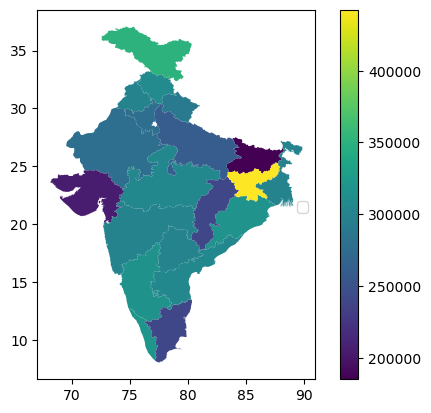

In [328]:
p1 = df4[:].plot(column='avg_s', legend=True)
p1.legend(bbox_to_anchor=(1, 0.5))  # Adjust the legend position


<Axes: xlabel='CollegeCityTier', ylabel='Salary'>

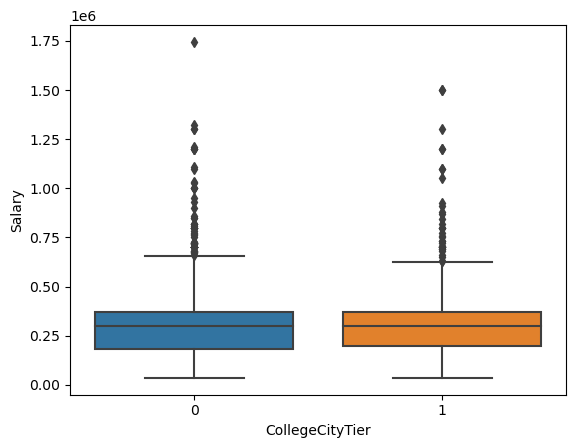

In [329]:
sns.boxplot(x = df2['CollegeCityTier'],y = df2['Salary'])

In [330]:
df2.columns

Index(['Salary', 'Gender', '10percentage', '12graduation', '12percentage',
       'CollegeTier', 'Degree', 'collegeGPA', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'Age', 'Cognitive',
       'Personality', 'Service'],
      dtype='object')

In [331]:
cat_features = ['Gender', 'Degree', 'CollegeState','CollegeTier']
cat_features

['Gender', 'Degree', 'CollegeState', 'CollegeTier']

In [332]:
num_features = ['Salary', '10percentage', '12graduation', '12percentage', 'collegeGPA',  'GraduationYear',
                'ComputerProgramming','ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'Age', 'Cognitive','Personality', 'Service']


<Axes: xlabel='GraduationYear', ylabel='Service'>

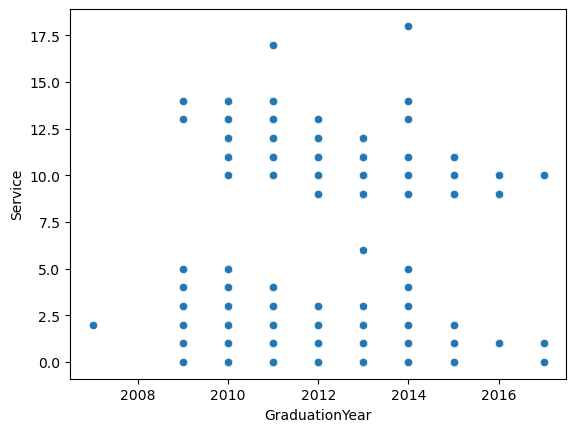

In [333]:
sns.scatterplot(x = df2['GraduationYear'] , y = df2.Service)

<Axes: xlabel='Cognitive', ylabel='Gender'>

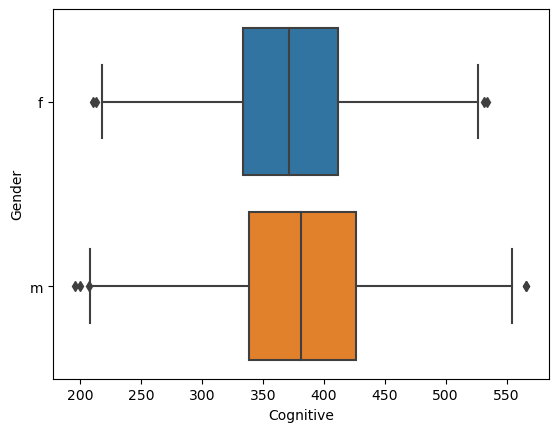

In [334]:
sns.boxplot(x = df2['Cognitive'] , y = df2.Gender)

<Axes: xlabel='10percentage', ylabel='Gender'>

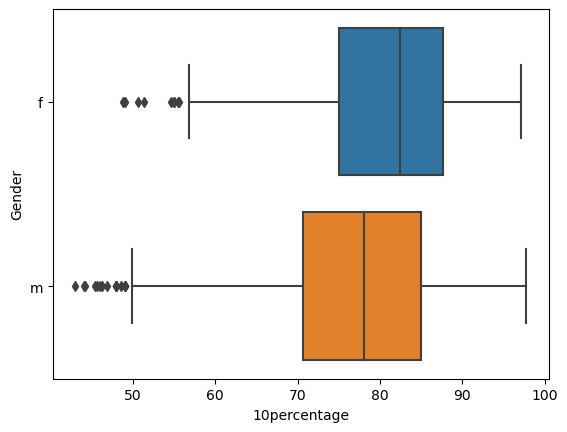

In [335]:
sns.boxplot(x = df2['10percentage'] , y = df2.Gender)

In [336]:
df2.AMCAT = df2.ComputerProgramming + df2.ElectronicsAndSemicon +df2.ComputerScience + df2.MechanicalEngg + df2.ElectricalEngg + df2.TelecomEngg + df2.ComputerProgramming + df2.ElectronicsAndSemicon + df2.ComputerScience + df2.MechanicalEngg + df2.ElectricalEngg + df2.TelecomEngg + df2.CivilEngg

C:\Users\saile\AppData\Local\Temp\ipykernel_14112\3055410918.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df2.AMCAT = df2.ComputerProgramming + df2.ElectronicsAndSemicon +df2.ComputerScience + df2.MechanicalEngg + df2.ElectricalEngg + df2.TelecomEngg + df2.ComputerProgramming + df2.ElectronicsAndSemicon + df2.ComputerScience + df2.MechanicalEngg + df2.ElectricalEngg + df2.TelecomEngg + df2.CivilEngg


<Axes: xlabel='Salary'>

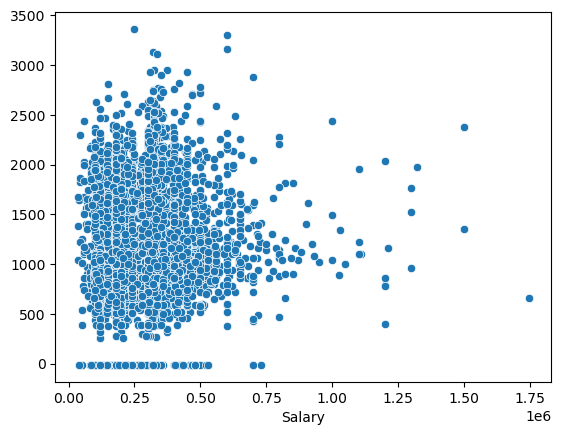

In [337]:
sns.scatterplot(x= df2.Salary, y= df2.AMCAT)

In [338]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [339]:
df.Designation.unique()

array(['senior quality engineer', 'assistant manager', 'systems engineer',
       'senior software engineer', 'get', 'system engineer',
       'java software engineer', 'mechanical engineer',
       'electrical engineer', 'project engineer', 'senior php developer',
       'senior systems engineer', 'quality assurance engineer',
       'qa analyst', 'network engineer', 'product development engineer',
       'associate software developer', 'data entry operator',
       'software engineer', 'developer', 'electrical project engineer',
       'programmer analyst', 'systems analyst', 'ase',
       'telecommunication engineer', 'application developer',
       'ios developer', 'executive assistant', 'online marketing manager',
       'documentation specialist', 'associate software engineer',
       'management trainee', 'site manager', 'software developer',
       '.net developer', 'production engineer', 'jr. software engineer',
       'trainee software developer', 'ui developer',
       'assi

In [340]:
df11 = df[df.Specialization == 'computer science & engineering']

In [341]:
def func1(a):
    if a == 'programmer analyst' or a =='software engineer' or a == 'hardware engineer' or a == 'associate engineer' :
        return a 
    else:
        return None
df11.Designation = df11.Designation.apply(func1)

C:\Users\saile\AppData\Local\Temp\ipykernel_14112\739155671.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11.Designation = df11.Designation.apply(func1)


In [342]:
df12 = df11[df11.Designation != None]

In [344]:
m = df[df.Gender == 'm'].sample(n = 500)
f = df[df.Gender == 'f'].sample(n = 500)
df_1000 = pd.concat([m,f], axis = 0)

<Axes: xlabel='Specialization'>

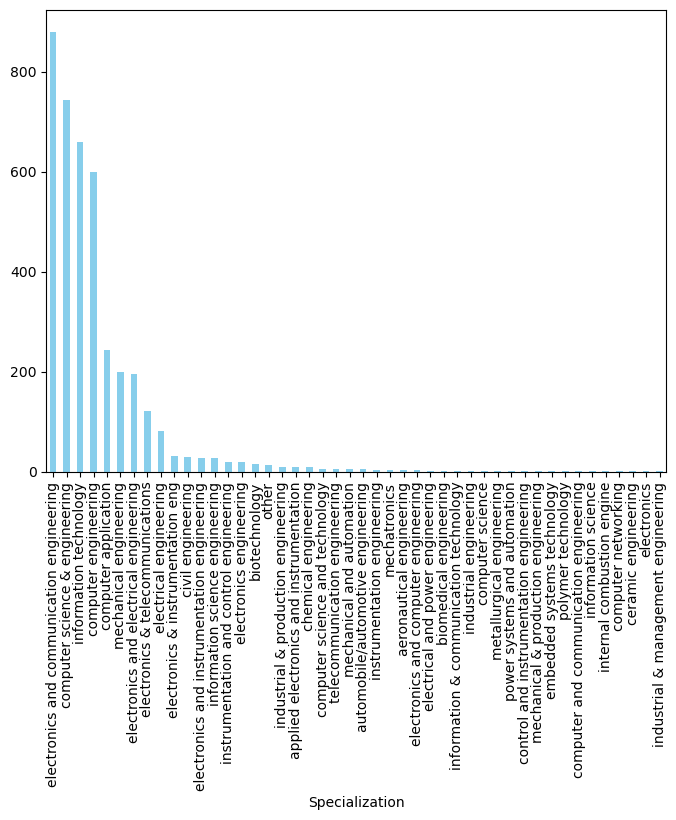

In [352]:
df['Specialization'].value_counts().plot(kind='bar', stacked=True, figsize=(8, 6), color='skyblue')

<Axes: ylabel='Specialization'>

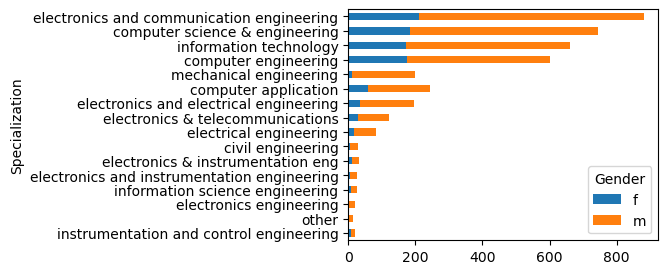

In [346]:
pd.crosstab(df['Specialization'], df['Gender']).sort_values(by = 'm',ascending = True)[30:].plot(kind='barh', stacked=True, figsize=(4,3),rot = 0)

In [347]:
pd.crosstab(df['Specialization'], df['Gender']).sort_values(by = 'm',ascending = False)[:]

Gender,f,m
Specialization,,
electronics and communication engineering,212,668
computer science & engineering,183,561
information technology,173,487
computer engineering,175,425
mechanical engineering,10,190
computer application,59,185
electronics and electrical engineering,34,162
electronics & telecommunications,28,93
electrical engineering,17,65


<Axes: ylabel='count'>

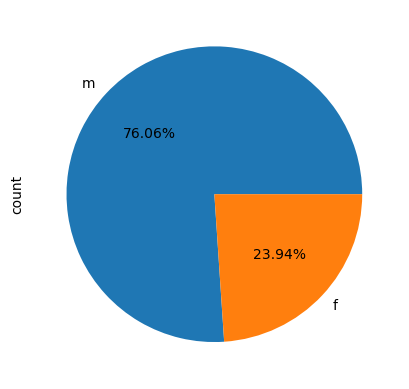

In [348]:
df.Gender.value_counts().plot.pie(autopct = '%.2f%%')